## Recommendation_System 
* A Recommendation System for an E-commerce website to recommend products to users based on their preference.

* The system is built based on popularity of the item, and based on collaborative filtering.

* In this project, books dataset is used in creating a system to recommend books to users.

* The aim of this project is to create a recommendation system for a book website exclusively for african books/authors

* The dataset was pulled from this [website](https://www.ascleiden.nl/content/webdossiers/africas-100-best-books-20th-century)  and customized to suit the features that are needed in creating the system.

* The features in the dataset includes: Author, Book_title, Genre of book, Rating of book





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.decomposition import TruncatedSVD

In [ ]:
df = pd.read_excel("/content/Book (4).xlsx")

In [ ]:
df.head(70)

,Unnamed: 0,Author,Book_Title,Genre,ratings,english meaning,ratings.1
0,NaN,Chinua Achebe,Things fall apart,Fiction,4,NaN,NaN
1,NaN,Meshack Asare,Sosu's Call,Literature,3,NaN,NaN
2,NaN,Mariama Ba,"Une si longue lettre,",Novel,4,NaN,NaN
3,NaN,Mia Couto,Terra Sonâmbula,Fiction,3,NaN,NaN
4,NaN,Tsitsi Dangarembga,Nervous Conditions,Novel,3,NaN,NaN
...,...,...,...,...,...,...,...
65,NaN,"Serote, Mongane",Third World Express,Poetry,4,NaN,NaN
66,NaN,"Shaaban, Robert Bin",Utenzi wa vita vya uhuru,Poetry,4,NaN,NaN
67,NaN,Sony Labou Tansi,La vie et demie,Novel,3,NaN,NaN
68,NaN,"Sow Fall, Aminata",La grève des battus,Literature,1,NaN,NaN


In [ ]:
df['Genre'].unique()

array(['Fiction', 'Literature', 'Novel', 'History', 'HIstory',
       'Historical Fiction', 'Biography', 'Historical Novel', 'Poetry',
       'Drama', 'Autobiography', 'Short Story', 'Non-fiction', 'Fantasy',
       'Economics', 'New Age', 'Diary', 'Political Fiction', 'Philosopy',
       'Science Fiction', 'Sociology', 'Philosophy'], dtype=object)

In [ ]:
df.rename(index={'HIstory':'History'}, inplace =True)

In [ ]:
df['Genre'].unique()

array(['Fiction', 'Literature', 'Novel', 'History', 'HIstory',
       'Historical Fiction', 'Biography', 'Historical Novel', 'Poetry',
       'Drama', 'Autobiography', 'Short Story', 'Non-fiction', 'Fantasy',
       'Economics', 'New Age', 'Diary', 'Political Fiction', 'Philosopy',
       'Science Fiction', 'Sociology', 'Philosophy'], dtype=object)

In [ ]:
# dropping null values
df.drop(columns=['Unnamed: 0','english meaning','ratings.1'],inplace=True)
df

,Author,Book_Title,Genre,ratings
0,Chinua Achebe,Things fall apart,Fiction,4
1,Meshack Asare,Sosu's Call,Literature,3
2,Mariama Ba,"Une si longue lettre,",Novel,4
3,Mia Couto,Terra Sonâmbula,Fiction,3
4,Tsitsi Dangarembga,Nervous Conditions,Novel,3
...,...,...,...,...
96,"Mphahlele, Ezekiel",Down Second Avenue,Biography,3
97,"Mudimbe, V. Y.",The invention of Africa Indiana,Philosophy,3
98,"Nkrumah, Kwame",Ghana: autobiography of Kwame Nkrumah,Autobiography,4
99,"Plaatje, Sol",Native life in South Africa,History,3


In [ ]:
# renaming column
df.rename(columns={'Genre':'genre'},inplace=True)

In [ ]:
df.ratings.unique()

array([4, 3, 2, 1, 5])

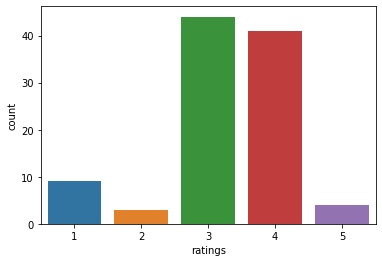

In [ ]:
# rating visualization
sns.countplot(data=df, x='ratings')
plt.show()

## i. Popularity Based Recommendation System
* Popularity based is aimed to target the new customers and recommend the most popular products sold on a business' website to them which is a way to cold start a recommendation system.


In [ ]:
ratings_count= pd.DataFrame(df.groupby(['genre'])['ratings'].sum())
top_10= ratings_count.sort_values('ratings',ascending=False).head(10)
print("The following genre of books are recommended")
top_10.merge(df, left_index= True, right_on='genre')
top_10.head(20)

The following genre of books are recommended


,ratings
genre,
Fiction,77
Novel,58
History,48
Literature,38
Poetry,34
Drama,13
Autobiography,9
New Age,8
Biography,6


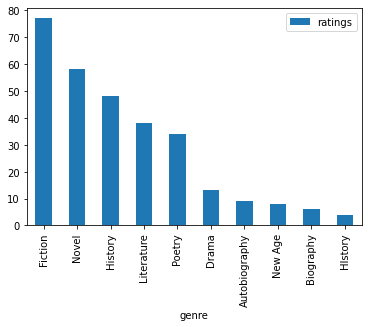

In [ ]:
top_10.head(10).plot(kind = "bar")

### Inference:
* The list appears in the order of the higher the rating a genre gets, the higher the chances of that genre to be recommended to a any new user. 
* In this case, fiction books had higher ratings, this is why it is considered to be top priority and history books are least in the popularity based recommendation list

## Collaborative Filtering

In [ ]:
# converting the dataframe into a matrix on a pivot table, and fill empty spaces with zeros
df_matrix = df.pivot_table(values='ratings', index='genre', columns='Book_Title', fill_value=0)
df_matrix.head()

Book_Title,A Grain of Wheat,A dry white season,A geração da utopia,A question of power,Abessijnse kronieken,Accumulation on a world scale,Ake: The Years of Childhood,Amal'eZulu,Anowa,Antériorité des civilisations nègre,...,Things fall apart,Third World Express,Ualalapi,Un attieké pour Elgass,Unity and struggle,Utenzi wa vita vya uhuru,Woman at point zero,Zayni Barakat,al-Mawt 'ala al as-falt,"Une si longue lettre,"
genre,,,,,,,,,,,,,,,,,,,,,
Autobiography,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Diary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drama,0,0,0,0,0,0,0,0,3,0,...,0,0,0,0,0,0,0,0,0,0
Economics,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_matrix.shape

(22, 101)

* the matrix will have to be transposed, so that the genres can be on the columns position as the features and the book title on the index position, for subsequent decomposing

In [ ]:
# transpose the matrix table
df_t = df_matrix.T
df_t.head(100)

genre,Autobiography,Biography,Diary,Drama,Economics,Fantasy,Fiction,HIstory,Historical Fiction,Historical Novel,...,New Age,Non-fiction,Novel,Philosophy,Philosopy,Poetry,Political Fiction,Science Fiction,Short Story,Sociology
Book_Title,,,,,,,,,,,,,,,,,,,,,
A Grain of Wheat,0,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0
A dry white season,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A geração da utopia,0,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A question of power,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Abessijnse kronieken,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Unity and struggle,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
Utenzi wa vita vya uhuru,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
Woman at point zero,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0


In [ ]:
df_t.shape

(101, 22)

In [ ]:
#decomposing matrix
SVD = TruncatedSVD(n_components=21)
decomposed_matrix = SVD.fit_transform(df_t)
decomposed_matrix.shape

(101, 21)

In [ ]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(101, 101)

* i is assigned to whatever index(book/product) is selected at random, and converted to a list as the product id

In [ ]:
whilei = int(input('type your prefered genre here')):

except TypeError:
    print("invalid! type a genre again!")

continue:

SyntaxError: ignored

* 3- fiction "a question of power" 
* 20- new age "cutting the rose"
* 77-novel "Terra sonâmbula	Caminho"
* 50- literature "Les bouts de bois de Dieu"
* 23-science fiction "Die swerfjare van Poppie Nongen"
* 30- diary "In my father's house"
* 90- history "The struggle for Mozambique"
* 8-drama "anowa"
* 24- biography "Down Second Avenue"
* 27- Autobiography "Ghana: autobiography of Kwame Nkrumah"
* 5- economics "Accumulation on a world scale"
* 15- historical Fiction "chaka"
* 99-poetry "al-Mawt  'ala al as-falt"

In [ ]:
i=df_t.index[99]
i

"al-Mawt\xa0 'ala al as-falt"

In [ ]:
i=df_t.index[20]
product_names = list(df_t.index)
product_ID = product_names.index(i)
product_ID

20

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(101,)

* Another list is then created as the recommendation list, and the number of items to recommend is inputed without the book/product that was being selected at random at first.
* in this case if a user selects a book at random, 20 other books/product is being recommended to that user.

In [ ]:
Recommend = list(df_t.index[correlation_product_ID > 0.020])
Recommend.remove(i) 
print('Books you may also like')
Recommend[0:20]

Books you may also like


['A dry white season',
 'A geração da utopia',
 'Abessijnse kronieken',
 'Beyond the mask, race, gender and identity',
 'Bones',
 'Butterfly burning',
 'Citizen and subject: contemporary Africa and the legacy of late colonialism',
 'Die swerfjare van Poppie Nongen',
 'Ingqumbo yeminyanya (Eng. versie)',
 'Inkinnsela yaseMgungundlovu',
 'Le pauvre Christ de Bomba (English version)',
 'Le vieux nègre et la médaille',
 "Les contes d'Amadou Koumba",
 'Living, loving and lying awake at night',
 'Maps',
 'Murambi ou le livre des ossements',
 'Nedjma',
 'O testamento do Sr. Nepomuceno da Silva Araújo',
 'Season of migration to the north',
 'Terra Sonâmbula\xa0']

* These are the books that are being recommended to the user when they selected the book at random.



## Saving and load model

In [ ]:
import pickle

In [ ]:
# saving the model as a pickle string
saved_model = pickle.dumps(Recommend[0:20])

In [ ]:
#Load the pickled model
recommend_from_pickle = pickle.loads(saved_model)

In [ ]:
recommend_from_pickle

['A dry white season',
 'A geração da utopia',
 'Abessijnse kronieken',
 'Beyond the mask, race, gender and identity',
 'Bones',
 'Butterfly burning',
 'Citizen and subject: contemporary Africa and the legacy of late colonialism',
 'Die swerfjare van Poppie Nongen',
 'Ingqumbo yeminyanya (Eng. versie)',
 'Inkinnsela yaseMgungundlovu',
 'Le pauvre Christ de Bomba (English version)',
 'Le vieux nègre et la médaille',
 "Les contes d'Amadou Koumba",
 'Living, loving and lying awake at night',
 'Maps',
 'Murambi ou le livre des ossements',
 'Nedjma',
 'O testamento do Sr. Nepomuceno da Silva Araújo',
 'Season of migration to the north',
 'Terra Sonâmbula\xa0']